In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
print(type(X_train), X_train.shape) # 50,000 samples, each pic is a 32x32
print(type(X_test), X_test.shape)   # 10,000 samples, each pic is a 32x32
print(type(y_train), y_train.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (10000, 32, 32, 3)
<class 'numpy.ndarray'> (50000, 1)
<class 'numpy.ndarray'> (10000, 1)


Do you see that the shape of the test dataset is already an array of 2D? 50 and 10 thousand images wich one column (feature). We don't need to reshape it. We can just use it as it is.

In [6]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

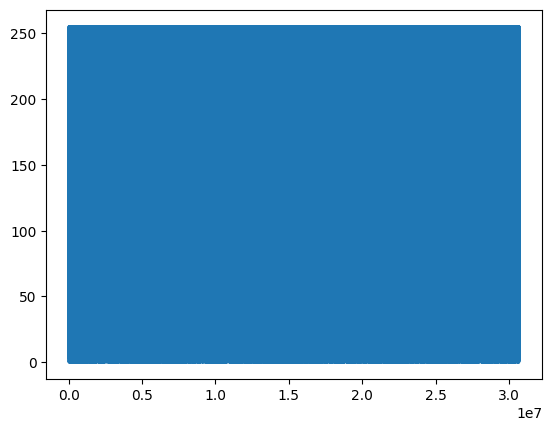

In [7]:
plt.plot(X_test.reshape(-1, 1));

In [8]:
def normalize_data_in_batches(data, batch_size=10000):
    normalized_data = np.empty_like(data, dtype=np.float32)
    for i in range(0, data.shape[0], batch_size):
        normalized_data[i:i+batch_size] = data[i:i+batch_size] / 255.0
    return normalized_data

X_train = normalize_data_in_batches(X_train)
X_test = normalize_data_in_batches(X_test)
y_train, y_test = y_train.flatten(), y_test.flatten()

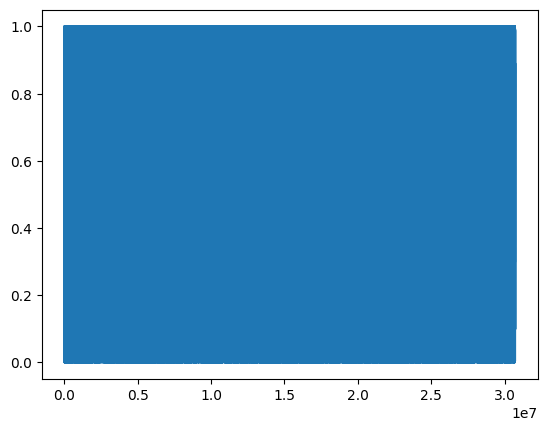

In [9]:
plt.plot(X_test.reshape(-1, 1));

In [10]:
# The data is only 2D
# Convolution expects height x width x color
print(type(X_train), X_train.shape) 
print(type(X_test), X_test.shape)
print(type(y_train), y_train.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (10000, 32, 32, 3)
<class 'numpy.ndarray'> (50000,)
<class 'numpy.ndarray'> (10000,)


In [11]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [12]:
K = len(set(y_train))
print("Total of classes:", K)

Total of classes: 10


In [13]:
print(X_train.shape[0])
i = Input(shape=X_train[0].shape)
x = Conv2D( 32, (3,3), strides=2, activation='relu')(i)
x = Conv2D( 64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

50000


2024-06-18 20:24:04.833802: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 20:24:05.122547: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 20:24:05.122583: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 20:24:05.131790: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-18 20:24:05.131835: I external/local_xla/xla/stream_executor

In [14]:
model.compile(
    optimizer = "adam",
    loss      = "sparse_categorical_crossentropy",
    metrics   = ["accuracy"]
)
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15


2024-06-18 20:24:16.060451: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-18 20:24:16.256792: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-18 20:24:16.762431: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-18 20:24:17.190684: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0a8479ee20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-18 20:24:17.190714: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-06-18 20:24:17.206388: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1718753057.312600  154943 d

1563/1563 [==============================] - 13s 6ms/step - loss: 1.5585 - accuracy: 0.4298 - val_loss: 1.3066 - val_accuracy: 0.5248
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2705 - accuracy: 0.5424 - val_loss: 1.0989 - val_accuracy: 0.6049
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1416 - accuracy: 0.5913 - val_loss: 1.0286 - val_accuracy: 0.6325
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0483 - accuracy: 0.6261 - val_loss: 1.0307 - val_accuracy: 0.6308
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9694 - accuracy: 0.6538 - val_loss: 0.9160 - val_accuracy: 0.6782
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9085 - accuracy: 0.6765 - val_loss: 0.8915 - val_accuracy: 0.6895
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8650 - accuracy: 0.6930 - val_loss: 0.8594 - val_accuracy: 0.7011
Ep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


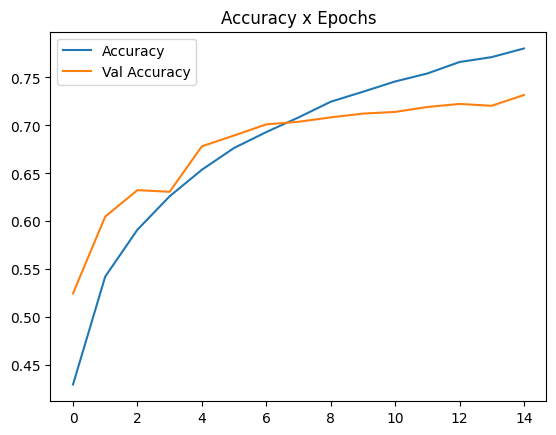

In [15]:
print(r.history.keys())
plt.plot(r.history['accuracy'], label="Accuracy");
plt.plot(r.history['val_accuracy'], label="Val Accuracy");
plt.title("Accuracy x Epochs");
plt.legend();

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


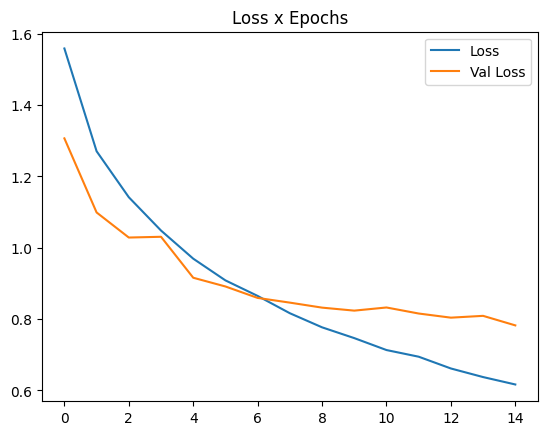

In [16]:
print(r.history.keys())
plt.plot(r.history['loss'], label="Loss");
plt.plot(r.history['val_loss'], label="Val Loss");
plt.title("Loss x Epochs");
plt.legend();

In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm. Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxix]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np. arange(len(classes))
    plt.xticks (tick_marks, classes, rotation=45)
    plt.yticks (tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color= "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()
    

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[717  21  56  15  19   6  12  16 104  34]
 [ 11 832   5   3   1   2  14   5  29  98]
 [ 57   9 656  44  81  49  45  37   9  13]
 [ 22  12  78 493  73 154  79  43  20  26]
 [ 18   4  69  54 706  25  38  70   7   9]
 [  8   8  52 194  55 597  25  44   8   9]
 [  5   5  46  41  39  20 817   8  10   9]
 [ 16   5  31  23  52  36   9 802   6  20]
 [ 36  30  14   9   7   4   3   7 868  22]
 [ 37  64   7   9   2   4   9  11  28 829]]


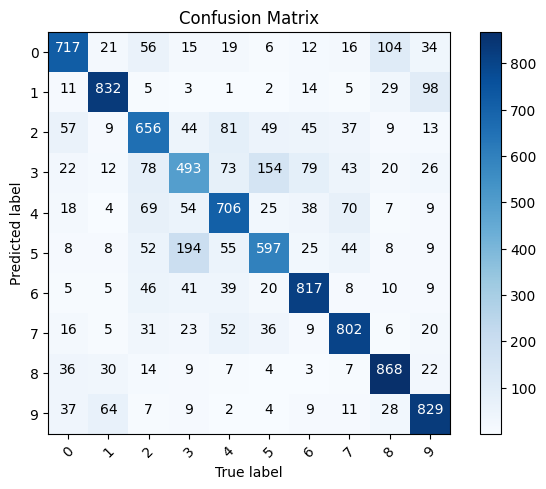

In [18]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [19]:
# Label mapping
labels = '''Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck
'''.split()

Text(0.5, 1.0, 'True label: Bird - Predicted: Dog')

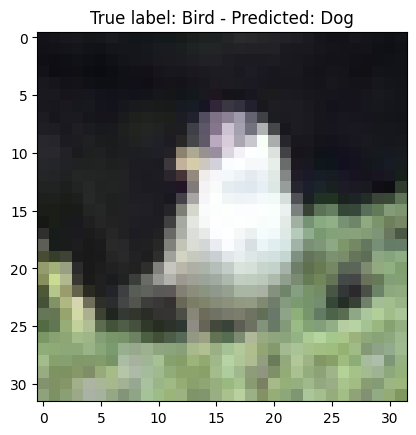

In [37]:
misclassified_idx = np.where(p_test != y_test)[0]

i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f"True label: {labels[y_test[i]]} - Predicted: {labels[p_test[i]]}")